In [19]:
import numpy as np 
import math
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler


In [7]:
df_10= pd.read_csv('nse_10yrs.csv')

In [8]:
dates=[]
for i in range(len(df_10)):
    dates.append(datetime.strptime(df_10['Date'][i],"%d-%m-%Y"))

In [9]:
dates=pd.DataFrame({'dates':dates})

In [10]:
df_10= pd.concat([df_10,dates],axis='columns',copy='False')

In [11]:
df_10

,Date,Open,High,Low,Close,Adj Close,Volume,dates
0,01-02-2010,4882.049805,4918.799805,4827.149902,4899.700195,4899.700195,0.0,2010-02-01
1,02-02-2010,4907.850098,4951.149902,4814.100098,4830.100098,4830.100098,0.0,2010-02-02
2,03-02-2010,4831.000000,4949.149902,4831.000000,4931.850098,4931.850098,0.0,2010-02-03
3,04-02-2010,4931.299805,4931.299805,4832.350098,4845.350098,4845.350098,0.0,2010-02-04
4,05-02-2010,4819.649902,4827.000000,4692.350098,4718.649902,4718.649902,0.0,2010-02-05
...,...,...,...,...,...,...,...,...
2468,27-01-2020,12197.099610,12216.599610,12107.000000,12119.000000,12119.000000,441200.0,2020-01-27
2469,28-01-2020,12148.099610,12163.549810,12024.500000,12055.799810,12055.799810,478500.0,2020-01-28
2470,29-01-2020,12114.900390,12169.599610,12103.799810,12129.500000,12129.500000,514400.0,2020-01-29
2471,30-01-2020,12147.750000,12150.299810,12010.599610,12035.799810,12035.799810,538100.0,2020-01-30


In [12]:
df_10['dates']=pd.to_datetime(df_10['dates'])
df_10=df_10.set_index('dates')
df_10

,Date,Open,High,Low,Close,Adj Close,Volume
dates,,,,,,,
2010-02-01,01-02-2010,4882.049805,4918.799805,4827.149902,4899.700195,4899.700195,0.0
2010-02-02,02-02-2010,4907.850098,4951.149902,4814.100098,4830.100098,4830.100098,0.0
2010-02-03,03-02-2010,4831.000000,4949.149902,4831.000000,4931.850098,4931.850098,0.0
2010-02-04,04-02-2010,4931.299805,4931.299805,4832.350098,4845.350098,4845.350098,0.0
2010-02-05,05-02-2010,4819.649902,4827.000000,4692.350098,4718.649902,4718.649902,0.0
...,...,...,...,...,...,...,...
2020-01-27,27-01-2020,12197.099610,12216.599610,12107.000000,12119.000000,12119.000000,441200.0
2020-01-28,28-01-2020,12148.099610,12163.549810,12024.500000,12055.799810,12055.799810,478500.0
2020-01-29,29-01-2020,12114.900390,12169.599610,12103.799810,12129.500000,12129.500000,514400.0


In [13]:
df_10=df_10.dropna(axis="rows")
df_10.isnull().sum()
df_10.shape

(2449, 7)

In [15]:
df_close=df_10.iloc[:,4]
df_close

dates
2010-02-01     4899.700195
2010-02-02     4830.100098
2010-02-03     4931.850098
2010-02-04     4845.350098
2010-02-05     4718.649902
                  ...     
2020-01-27    12119.000000
2020-01-28    12055.799810
2020-01-29    12129.500000
2020-01-30    12035.799810
2020-01-31    11962.099610
Name: Close, Length: 2449, dtype: float64

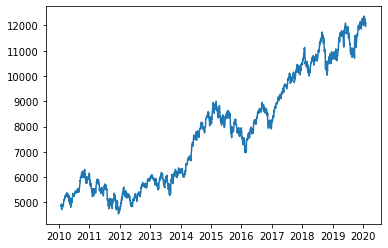

In [16]:
plt.plot(df_close)

In [17]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

In [20]:
sc=StandardScaler()

df_close_scaled= sc.fit_transform(df_close.values.reshape(-1, 1))


In [21]:
df_train=df_close_scaled[0:2000]
df_test= df_close_scaled[2000:]

In [22]:
X,Y=create_dataset(df_train,df_train,time_steps=50)
X_val,y_val=create_dataset(df_test,df_test,time_steps=50)

In [29]:
learning_rate = 0.01    
nepoch = 25               
T = 50                   # length of sequence
hidden_dim = 200         
output_dim = 1

bptt_truncate = 5
min_clip_value = -10
max_clip_value = 10

In [34]:
scale = 1/max(1., (2+2)/2.)
limit = math.sqrt(3.0 * scale)
weights = np.random.uniform(-limit, limit, size=(hidden_dim,T))
weights.shape



(200, 50)

In [35]:
U = np.random.uniform(0, 1, (hidden_dim, T))
W = np.random.uniform(0, 1, (hidden_dim, hidden_dim))
V = np.random.uniform(0, 1, (output_dim, hidden_dim))

In [36]:
U.shape

(200, 50)

In [37]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [38]:
for epoch in range(nepoch):
    # check loss on train
    loss = 0.0
    
    # do a forward pass to get prediction
    for i in range(Y.shape[0]):
        x, y = X[i], Y[i]                    # get input, output values of each record
        prev_s = np.zeros((hidden_dim, 1))   # here, prev-s is the value of the previous activation of hidden layer; which is initialized as all zeroes
        for t in range(T):
            new_input = np.zeros(x.shape)    # we then do a forward pass for every timestep in the sequence
            new_input[t] = x[t]              # for this, we define a single input for that timestep
            mulu = np.dot(U, new_input)
            mulw = np.dot(W, prev_s)
            add = mulw + mulu
            s = sigmoid(add)
            mulv = np.dot(V, s)
            prev_s = s

    # calculate error 
        loss_per_record = (y - mulv)**2 / 2
        loss += loss_per_record
    loss = loss / float(y.shape[0])
    
    """# check loss on val
    val_loss = 0.0
    for i in range(Y_val.shape[0]):
        x, y = X_val[i], Y_val[i]
        prev_s = np.zeros((hidden_dim, 1))
        for t in range(T):
            new_input = np.zeros(x.shape)
            new_input[t] = x[t]
            mulu = np.dot(U, new_input)
            mulw = np.dot(W, prev_s)
            add = mulw + mulu
            s = sigmoid(add)
            mulv = np.dot(V, s)
            prev_s = s

        loss_per_record = (y - mulv)**2 / 2
        val_loss += loss_per_record
    val_loss = val_loss / float(y.shape[0])

    print('Epoch: ', epoch + 1, ', Loss: ', loss, ', Val Loss: ', val_loss)"""
    
    print('Epoch: ', epoch + 1, ', Loss: ', loss)
    
    # train model
    for i in range(Y.shape[0]):
        x, y = X[i], Y[i]
    
        layers = []
        prev_s = np.zeros((hidden_dim, 1))
        dU = np.zeros(U.shape)
        dV = np.zeros(V.shape)
        dW = np.zeros(W.shape)
        
        dU_t = np.zeros(U.shape)
        dV_t = np.zeros(V.shape)
        dW_t = np.zeros(W.shape)
        
        dU_i = np.zeros(U.shape)
        dW_i = np.zeros(W.shape)
        
        # forward pass
        for t in range(T):
            new_input = np.zeros(x.shape)
            new_input[t] = x[t]
            mulu = np.dot(U, new_input)
            mulw = np.dot(W, prev_s)
            add = mulw + mulu
            s = sigmoid(add)
            mulv = np.dot(V, s)
            layers.append({'s':s, 'prev_s':prev_s})
            prev_s = s
            
        # derivative of pred
        dmulv = (mulv - y)
        
        # backward pass
        for t in range(T):
            dV_t = np.dot(dmulv, np.transpose(layers[t]['s']))
            dsv = np.dot(np.transpose(V), dmulv)
            
            ds = dsv
            dadd = add * (1 - add) * ds
            
            dmulw = dadd * np.ones_like(mulw)

            dprev_s = np.dot(np.transpose(W), dmulw)


            for i in range(t-1, max(-1, t-bptt_truncate-1), -1):
                ds = dsv + dprev_s
                dadd = add * (1 - add) * ds

                dmulw = dadd * np.ones_like(mulw)
                dmulu = dadd * np.ones_like(mulu)

                dW_i = np.dot(W, layers[t]['prev_s'])
                dprev_s = np.dot(np.transpose(W), dmulw)

                new_input = np.zeros(x.shape)
                new_input[t] = x[t]
                dU_i = np.dot(U, new_input)
                dx = np.dot(np.transpose(U), dmulu)

                dU_t += dU_i
                dW_t += dW_i
                
            dV += dV_t
            dU += dU_t
            dW += dW_t
            
            if dU.max() > max_clip_value:
                dU[dU > max_clip_value] = max_clip_value
            if dV.max() > max_clip_value:
                dV[dV > max_clip_value] = max_clip_value
            if dW.max() > max_clip_value:
                dW[dW > max_clip_value] = max_clip_value
                
            
            if dU.min() < min_clip_value:
                dU[dU < min_clip_value] = min_clip_value
            if dV.min() < min_clip_value:
                dV[dV < min_clip_value] = min_clip_value
            if dW.min() < min_clip_value:
                dW[dW < min_clip_value] = min_clip_value
        
        # update
        U -= learning_rate * dU
        V -= learning_rate * dV
        W -= learning_rate * dW

Epoch:  1 , Loss:  [[9600601.25773226]]
Epoch:  2 , Loss:  [[47818.47999805]]
Epoch:  3 , Loss:  [[12406.04689959]]
Epoch:  4 , Loss:  [[8582.36011948]]
Epoch:  5 , Loss:  [[81371.03739003]]
Epoch:  6 , Loss:  [[53184.8479179]]
Epoch:  7 , Loss:  [[18546.2618263]]
Epoch:  8 , Loss:  [[25451.56726735]]
Epoch:  9 , Loss:  [[95739.60805129]]
Epoch:  10 , Loss:  [[10363.84507293]]
Epoch:  11 , Loss:  [[16763.46589635]]
Epoch:  12 , Loss:  [[7300.93542592]]


<ipython-input-37-b683d5dd8fa4>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch:  13 , Loss:  [[6141.09553261]]
Epoch:  14 , Loss:  [[101692.20287896]]
Epoch:  15 , Loss:  [[84727.92442203]]
Epoch:  16 , Loss:  [[110660.80372046]]
Epoch:  17 , Loss:  [[15954.61877744]]
Epoch:  18 , Loss:  [[9508.91646794]]
Epoch:  19 , Loss:  [[7748.26564997]]
Epoch:  20 , Loss:  [[115876.3146831]]
Epoch:  21 , Loss:  [[8008.67636295]]
Epoch:  22 , Loss:  [[4864.181449]]
Epoch:  23 , Loss:  [[73688.17581073]]
Epoch:  24 , Loss:  [[4815.10606645]]
Epoch:  25 , Loss:  [[19280.04002591]]
